<a href="https://colab.research.google.com/github/kjyothiswaroop/LeNet-5-Architechture-/blob/master/LeNet5_CNN_for_Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand Written Digit Recognition - LeNet CNN**#

This repository performs the Hand Digit Recognition on the MNIST Data set. We use the Tensorflow framework to perform the following task.

The Details regarding the LeNet Model can be found in the following Paper:
http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

The data set is already present in the tf.keras API.
We will be performing the following steps on the data:

1) Loading and Preparing the Input Data.

2) Prepare the model by joining the layers of the model.

3)Training the Model with the train data by choosing an appropriate loss function.

4)Run the Model on the test data and check the accuracy.



In [1]:
#Import the Required Libraries
import tensorflow as tf
import numpy as np

print(tf.__version__)


2.2.0


In [2]:
#Loading the Data
print("Downloading Data .......")
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [0]:
#Preparing the Data
num_categories = 10
image_width = 28
image_height = 28
image_channels = 1

In [0]:
x_train = x_train.reshape(x_train.shape[0],image_width,image_height,image_channels)
x_test = x_test.reshape(x_test.shape[0],image_width,image_height,image_channels)

In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [0]:
#import the required libraries
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend
# Preparing The Model
## INPUt--CONV--Activation--Pooling--CONV--Activation--Pooling--FC--activation--FC--activation--FC--lossfunction
#LeNet 5 uses Tanh as activation, also a slight change we are making is that we are using Softmax as loss function
class LeNet:
  def init(image_channels,image_width,image_height,num_categories,weightsPath=None):
    if backend.image_data_format() == "channels_first" :
       inputShape = (image_channels,image_width,image_height)
    else :
       inputShape = (image_width,image_height,image_channels)
   
   #Initialise the Model
    model = models.Sequential()
   #add the first layer
    model.add(layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),padding='valid',activation = tf.nn.tanh,input_shape = inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
   #Second Layer
    model.add(layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),padding='valid',activation = tf.nn.tanh,input_shape = inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
   #Flatten the layers so that they can be fed to the dense layers
    model.add(layers.Flatten())
   #Add the Dense Layer 1
    model.add(layers.Dense(units=120,activation=tf.nn.tanh))
   #Add the Dense Layer 2
    model.add(layers.Dense(units=84,activation=tf.nn.tanh))
   #Now let us finally Add the Softmax Layer
    model.add(layers.Dense(units=num_categories,activation=tf.nn.softmax))
   #For the Purpose of Transfer Learning if we already have weight we supply them for the purpose of Training
    if weightsPath is not None:
       model.load_weights(weightsPath)
    return model

In [8]:
#Compile the Model
print('Compiling........')
model = LeNet.init(image_channels=1,image_width=28,image_height=28,num_categories=10,weightsPath=None)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Compiling........
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
      if(logs.get('accuracy')>0.99):
         self.model.stop_training = True
#Train the Model
batch_size = 128
epochs = 100
#run the model
history = model.fit(x=x_train,y=y_train, validation_data = (x_test,y_test),batch_size = batch_size, epochs=epochs,verbose=1,callbacks=[myCallback()])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 1.2907 - accuracy: 0.6690 - val_loss: 0.5967 - val_accuracy: 0.8580
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5039 - accuracy: 0.8683 - val_loss: 0.4166 - val_accuracy: 0.8879
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3982 - accuracy: 0.8888 - val_loss: 0.3520 - val_accuracy: 0.9042
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3481 - accuracy: 0.9004 - val_loss: 0.3143 - val_accuracy: 0.9123
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3141 - accuracy: 0.9098 - val_loss: 0.2856 - val_accuracy: 0.9190
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2871 - accuracy: 0.9172 - val_loss: 0.2616 - val_accuracy: 0.9246
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2644 - accuracy: 0.9237 - val_loss: 0.2409 - val_accuracy: 0.9298

<Figure size 432x288 with 0 Axes>

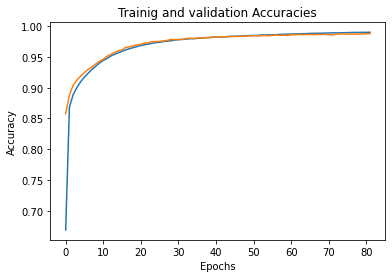

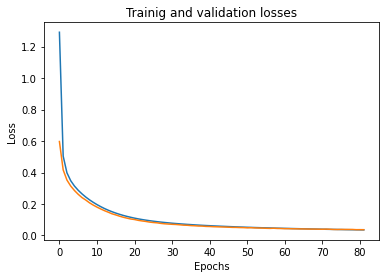

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_accuarcy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_accuarcy,label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Trainig and validation Accuracies')
plt.figure()

plt.plot(epochs,loss, label='Training Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Trainig and validation losses')
plt.figure()



In [11]:
#Evaluating
(loss,accuracy) = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)
print("accuracy:{:.2f}%".format(accuracy*100))

79/79 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9877
accuracy:98.77%


#Regenerating the Images and their Predictions#
The Below code helps in regenerating the images and their labels.

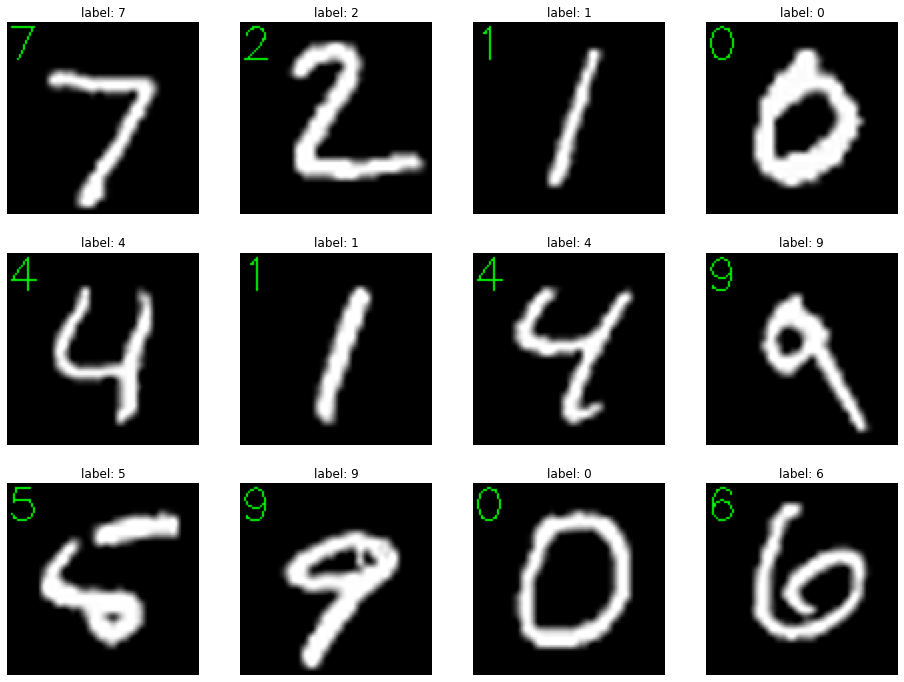

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
num_predictions = 12
test_indices = np.random.choice(np.arange(0,len(y_test)),size = (num_predictions, ))
test_images = np.stack(([x_test[i] for i in test_indices]))
test_labels = np.stack(([y_test[i] for i in test_indices]))
predictions = model.predict(x_test)
for i in range(num_predictions):
   prediction = np.argmax(predictions[i])
   image = (x_test[i]*255).astype("uint8")
   image = cv2.resize(image , (96,96),interpolation=cv2.INTER_CUBIC)
   image = cv2.merge([image]*3)
   if prediction == y_test[i]:
      rgb_color = (0,255,0)
   else:
      rgb_color = (255,0,0)
   cv2.putText(image,str(prediction),(0,18),cv2.FONT_HERSHEY_SIMPLEX,0.75,rgb_color,1)
   sp = plt.subplot(nrows,ncols,i+1,title="label: %s" % y_test[i])
   sp.axis("Off")
   plt.imshow(image)
plt.show()
